## DB Scan (Density Based Clustering)
### Density based clustering locates regions of high density that are seperated from one another by regions of low density.
### Density is defined as the number of points within a specified radius

In [4]:
# Install basepackages
!conda install -c conda-forge  basemap matplotlib==3.1 -y

Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Generating Data
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [6]:
# Providing input data points
X, y = createDataPoints([[4,3], [2,-1], [-1,4]], 1500, 0.5)

In [7]:
# Building Model
## DB Scan works based on density of object
epsilon = 0.3 # determines a specific radius for number of points
minimumSamples = 7 # determines minimum number of data points we want in a neighborhood to define a cluster
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([2, 0, 0, ..., 0, 0, 2])

In [8]:
# Distinguish Outliers
## First, create an array of booleans using the labels from db
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True,  True, ...,  True,  True,  True])

In [11]:
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of Clusters: ", n_clusters_)

# Remove repetions in labels by turning it into a set
unique_labels = set(labels)
print("Unique labels: ", unique_labels)

Number of Clusters:  3
Unique labels:  {0, 1, 2}


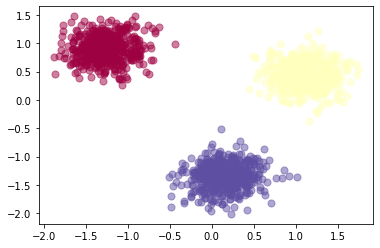

In [13]:
# Data Visualization
## Create colors for clusters
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

## Plot points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'

    class_member_mask = (labels == k)

    ## Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0], xy[:, 1], s=50, c=[col], marker=u'o', alpha=0.5) 

    ## Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker=u'o', alpha=0.5)   

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


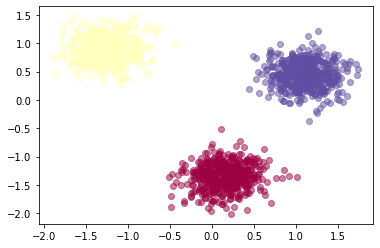

In [14]:
# DB Scan vs K-means
from sklearn.cluster import KMeans
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters= k, n_init= 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker=u'o', alpha=0.5)
plt.show()